# Numerical Methods for Solivng Ordinary Differential Equations: ***SHO***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [1]:
include("../DiffEqs/DESolver.jl")
using Plots, LaTeXStrings, JLD, Latexify
figpath = "../../Figs/Q2/"
datapath = "../../Data/Q2/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

## Simple Harmonic Osillation numberical solution

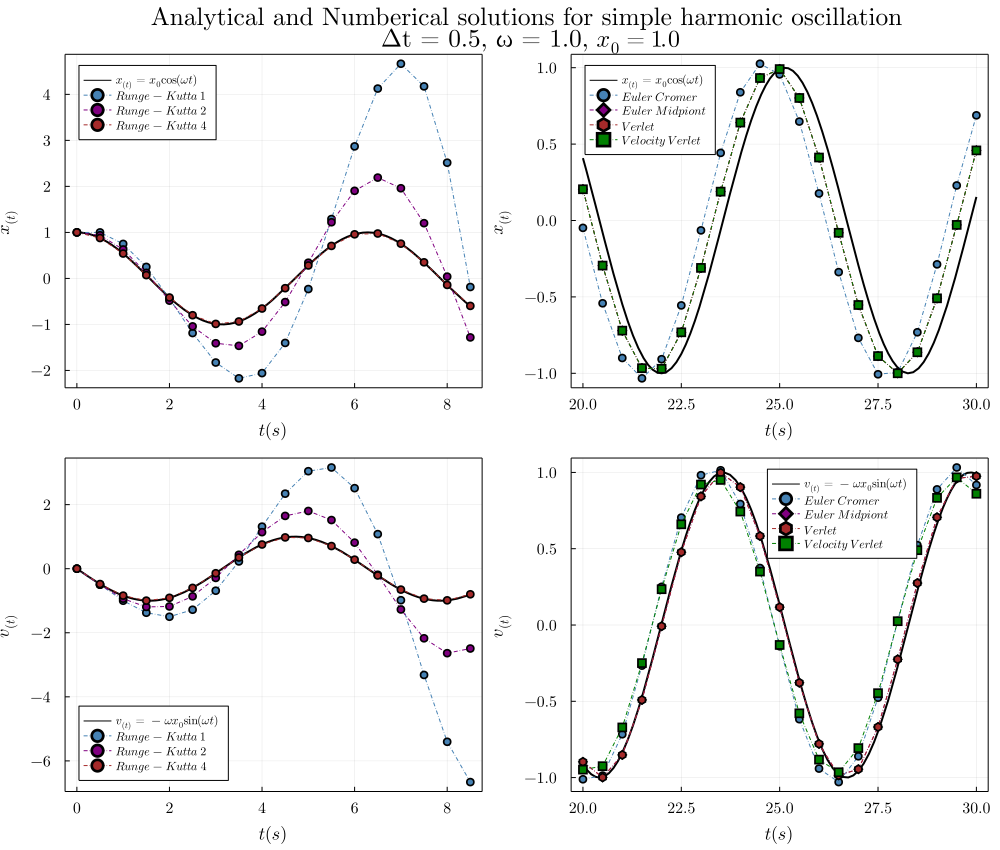

In [2]:
ω, x₀ = 1.0, 1.0
Parameters = Dict(:ẋ => (t, x) -> [x[2], -ω * x[1]], :x₀ => [x₀, 0.0], :t₀ => 0.0, :t₁ => 8.5, :h => 0.5)

XPlot1 = begin
    plot(t -> (x₀ * cos(ω * t)), Parameters[:t₀], Parameters[:t₁], lw = 2, c = :black, label = L"x_{(t)} = x_0 \mathrm{cos}(\omega t)",)

    time, phase = DiffEqsSolver.EulerDES(; Parameters...)
    plot!(time, getindex.(phase, 1), ls = :dashdot, marker = :circle, c = :steelblue, label = L"Runge-Kutta\ 1")

    time, phase = DiffEqsSolver.RK2DES(; Parameters...)
    plot!(time, getindex.(phase, 1), ls = :dashdot, marker = :circle, c = :purple, label = L"Runge-Kutta\ 2")

    time, phase = DiffEqsSolver.RK4DES(; Parameters...)
    plot!(time, getindex.(phase, 1), ls = :dashdot, marker = :circle, c = :brown, label = L"Runge-Kutta\ 4")

    plot!(legend = :topleft, ylabel = L"x_{(t)}", xlabel = L"t(s)")
end

VPlot1 = begin
    plot(t -> (-ω * x₀ * sin(ω * t)), Parameters[:t₀], Parameters[:t₁], lw = 2, c = :black, label = L"v_{(t)} = -\omega x_0 \mathrm{sin}(\omega t)",)

    time, phase = DiffEqsSolver.EulerDES(; Parameters...)
    plot!(time, getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :steelblue, label = L"Runge-Kutta\ 1")

    time, phase = DiffEqsSolver.RK2DES(; Parameters...)
    plot!(time, getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :purple, label = L"Runge-Kutta\ 2")

    time, phase = DiffEqsSolver.RK4DES(; Parameters...)
    plot!(time, getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :brown, label = L"Runge-Kutta\ 4")

    plot!(legend = :bottomleft, ylabel = L"v_{(t)}", xlabel = L"t(s)")
end
Plot11 = plot(XPlot1, VPlot1, layout = (2, 1), size = (1000, 850))

ω, x₀ = 1.0, 1.0
Parameters = Dict(:ẍ => (t, x, ẋ) -> (-ω * x), :ẋ₀ => [0.0], :x₀ => [x₀], :t₀ => 0.0, :t₁ => 30.0, :h => 0.5)

XPlot2 = begin
    plot(t -> (x₀ * cos(ω * t)), Parameters[:t₀] + 20.0, Parameters[:t₁], lw = 2, c = :black, label = L"x_{(t)} = x_0 \mathrm{cos}(\omega t)",)

    time, xlist, ẋlist = DiffEqsSolver.EulerCromerDES(; Parameters...)
    plot!(time[end-20:end], getindex.(xlist, 1)[end-20:end], ls = :dashdot, marker = :c, c = :steelblue, label = L"Euler\ Cromer")

    time, xlist, ẋlist = DiffEqsSolver.EulerMidPiontDES(; Parameters...)
    plot!(time[end-20:end], getindex.(xlist, 1)[end-20:end], ls = :dashdot, marker = :d, c = :purple, label = L"Euler\ Midpiont")

    time, xlist, ẋlist = DiffEqsSolver.VerletDES(; Parameters...)
    plot!(time[end-20:end], getindex.(xlist, 1)[end-20:end], ls = :dashdot, marker = :h, c = :brown, label = L"Verlet")

    time, xlist, ẋlist = DiffEqsSolver.VelVerDES(; Parameters...)
    plot!(time[end-20:end], getindex.(xlist, 1)[end-20:end], ls = :dashdot, marker = :r, c = :green, label = L"Velocity\ Verlet")

    plot!(legend = :topleft, ylabel = L"x_{(t)}", xlabel = L"t(s)")
end

VPlot2 = begin
    plot(t -> (-ω * x₀ * sin(ω * t)), Parameters[:t₀] + 20.0, Parameters[:t₁], lw = 2, c = :black, label = L"v_{(t)} = -\omega x_0 \mathrm{sin}(\omega t)",)

    time, xlist, ẋlist = DiffEqsSolver.EulerCromerDES(; Parameters...)
    plot!(time[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :c, c = :steelblue, label = L"Euler\ Cromer")

    time, xlist, ẋlist = DiffEqsSolver.EulerMidPiontDES(; Parameters...)
    plot!(time[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :d, c = :purple, label = L"Euler\ Midpiont")

    time, xlist, ẋlist = DiffEqsSolver.VerletDES(; Parameters...)
    plot!(time[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :h, c = :brown, label = L"Verlet")

    time, xlist, ẋlist = DiffEqsSolver.VelVerDES(; Parameters...)
    plot!(time[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :r, c = :green, label = L"Velocity\ Verlet")

    plot!(legend = 80, ylabel = L"v_{(t)}", xlabel = L"t(s)")
end
Plot12 = plot(XPlot2, VPlot2, layout = (2, 1), size = (1000, 850))


Plot1 = plot(Plot11, Plot12, plot_title = "Analytical and Numberical solutions for simple harmonic oscillation\n Δt = 0.5, ω = 1.0, " * L"x_0 = 1.0")

## Simple Harmonic Osillation Phase plot

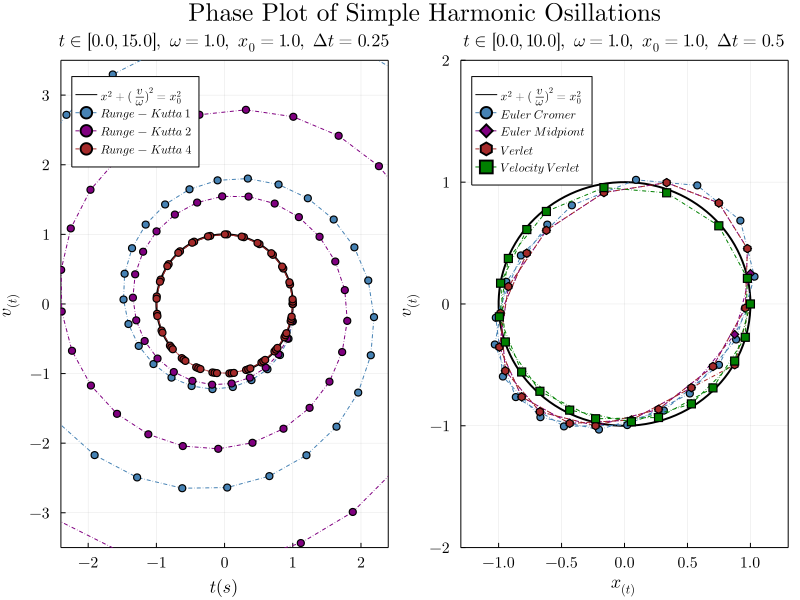

In [3]:
ω, x₀ = 1.0, 1.0
Parameters = Dict(:ẋ => (t, x) -> [x[2], -ω * x[1]], :x₀ => [x₀, 0.0], :t₀ => 0.0, :t₁ => 15.0, :h => 0.25)

PhasePlot1 = begin
    plot(t -> (x₀ * cos(ω * t)), t -> (-ω * x₀ * sin(ω * t)), Parameters[:t₀] + 20.0, Parameters[:t₁], lw = 2, c = :black, label = L"x^2 + (\frac{v}{\omega})^2 = x_0 ^2",)

    time, phase = DiffEqsSolver.EulerDES(; Parameters...)
    plot!(getindex.(phase, 1), getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :steelblue, label = L"Runge-Kutta\ 1")

    time, phase = DiffEqsSolver.RK2DES(; Parameters...)
    plot!(getindex.(phase, 1), getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :purple, label = L"Runge-Kutta\ 2")

    time, phase = DiffEqsSolver.RK4DES(; Parameters...)
    plot!(getindex.(phase, 1), getindex.(phase, 2), ls = :dashdot, marker = :circle, c = :brown, label = L"Runge-Kutta\ 4")

    plot!(legend = :topleft, ylabel = L"v_{(t)}", xlabel = L"t(s)", xlim = (-2.4, 2.4), ylim = (-3.5, 3.5), title = L"t \in [0.0,15.0],\ \omega = 1.0,\ x_0 = 1.0,\ \Delta t = 0.25")
end

Parameters = Dict(:ẍ => (t, x, ẋ) -> (-ω * x), :ẋ₀ => [0.0], :x₀ => [x₀], :t₀ => 0.0, :t₁ => 10.0, :h => 0.5)

PhasePlot2 = begin
    plot(t -> (x₀ * cos(ω * t)), t -> (-ω * x₀ * sin(ω * t)), Parameters[:t₀] + 20.0, Parameters[:t₁], lw = 2, c = :black, label = L"x^2 + (\frac{v}{\omega})^2 = x_0 ^2",)

    time, xlist, ẋlist = DiffEqsSolver.EulerCromerDES(; Parameters...)
    plot!(getindex.(xlist, 1)[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :c, c = :steelblue, label = L"Euler\ Cromer")

    time, xlist, ẋlist = DiffEqsSolver.EulerMidPiontDES(; Parameters...)
    plot!(getindex.(xlist, 1)[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :d, c = :purple, label = L"Euler\ Midpiont")

    time, xlist, ẋlist = DiffEqsSolver.VerletDES(; Parameters...)
    plot!(getindex.(xlist, 1)[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :h, c = :brown, label = L"Verlet")

    time, xlist, ẋlist = DiffEqsSolver.VelVerDES(; Parameters...)
    plot!(getindex.(xlist, 1)[end-20:end], getindex.(ẋlist, 1)[end-20:end], ls = :dashdot, marker = :r, c = :green, label = L"Velocity\ Verlet")

    plot!(legend = :topleft, xlabel = L"x_{(t)}", ylabel = L"v_{(t)}", xlim = (-1.3, 1.3), ylim = (-2, 2), title = L"t \in [0.0,10.0],\ \omega = 1.0,\ x_0 = 1.0,\ \Delta t = 0.5")
end

Plot2 = plot(PhasePlot1, PhasePlot2, layout = (1, 2), size = (800, 600), plot_title = "Phase Plot of Simple Harmonic Osillations")

In [4]:
savefig(Plot1, figpath * "SHO.pdf")
savefig(Plot2, figpath * "Phase.pdf")